In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
processeddata=pd.read_csv(r'preprocessed_wosq.csv', index_col='Id')
processeddata

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_654683e33,0.000000,0,6,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,38,4
ID_389eb5f20,0.000000,0,6,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,4
ID_5bef9b553,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,24,2
ID_55199c2f3,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,23,2
ID_079963679,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_ac3bb3102,0.000000,0,4,0,1,1,0,0,1,2,...,0,0,0,0,0,1,0,1,13,1
ID_48bad74d9,0.000000,0,4,0,1,1,0,0,0,2,...,0,1,0,0,0,0,1,0,74,4
ID_97c0fffa9,0.000000,0,4,0,1,1,0,0,0,2,...,0,1,0,0,0,0,1,0,40,4


In [3]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column

In [4]:
class_names=processeddata.Target.unique()
a=processeddata
class_names=list(class_names)
col1=list(processeddata.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
col1=list(filter(lambda a: a not in data_notnum , col1))
print(len(col1))
col1=list(set(col1)-set(['Target']))
print(len(col1))
X_sq = processeddata[col1] # features for dataset which includes squared parameters
y_sq = processeddata.Target #target

130
129


In [5]:
#For selecting the most appopriate columns for our model we will perform two operations.

#Random Forest for feature importance
#Eliminate highly correlated values
clf = RandomForestClassifier()
clf.fit(X_sq , y_sq)

imp = clf.feature_importances_
name = np.array(X_sq.columns.values.tolist())

df_imp = pd.DataFrame({'feature':name, 'importance':imp})
df_imp = df_imp.sort_values(by='importance', ascending=False)

In [19]:
imp

['meaneduc',
 'dependency',
 'v2a1',
 'overcrowding',
 'hogar_nin',
 'edjefe',
 'qmobilephone',
 'rooms',
 'r4t1',
 'r4t2',
 'Target']

C:\Users\rames\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


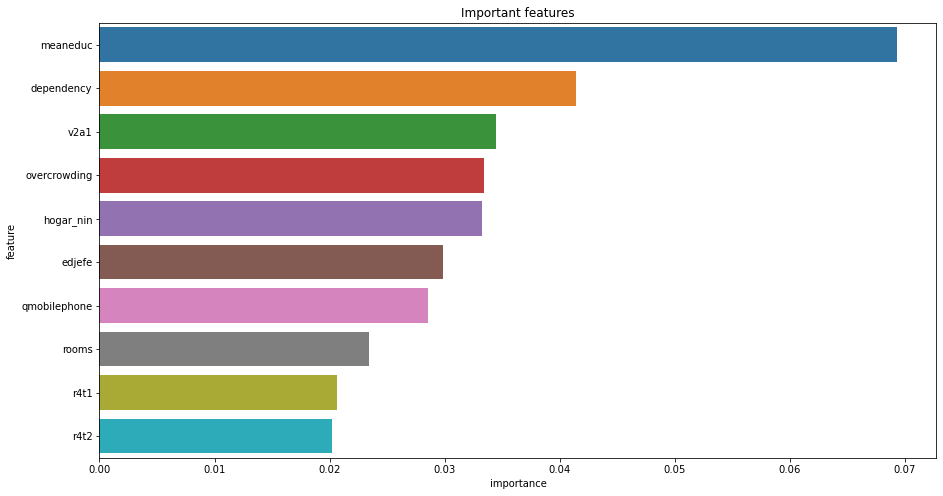

In [6]:
plt.figure(figsize=(15,8))

sns.barplot(df_imp.loc[(df_imp['importance'] > 0.02),'importance'], y = df_imp.loc[(df_imp['importance'] > 0.02),'feature'])
plt.title('Important features')
plt.show()


In [21]:
important_cols = df_imp['feature']
x_ = X_sq[important_cols[:10]]

# getting top 10 columns and target to compare with mean of non vulnerable data points
imp=['meaneduc', 'dependency', 'hogar_nin', 'overcrowding', 'edjefe', 'v2a1', 'qmobilephone', 'rooms', 'r4t1', 'r4t2']
imp=list(map(lambda x:str(x),imp))
imp.append('Target')

In [22]:
a1= processeddata[imp]
a1= a1.loc[a['Target'] == 4]
a1=pd.DataFrame(a1.mean())
a1=a1.rename(columns = {0: "Non vulnerable"}) 
a1

,Non vulnerable
meaneduc,10.369458
dependency,0.912887
hogar_nin,1.075783
overcrowding,1.427018
edjefe,6.019320
v2a1,66060.203111
qmobilephone,3.020486
rooms,5.205363
r4t1,0.562292
r4t2,3.234677


In [23]:
b=processeddata[imp]
b=b.loc[b['Target']==3]
b=pd.DataFrame(b.mean())
b=b.rename(columns = {0: "Vulnerable"}) 
b

,Vulnerable
meaneduc,7.633402
dependency,1.347898
hogar_nin,1.692875
overcrowding,1.753986
edjefe,4.461916
v2a1,28364.449770
qmobilephone,2.788698
rooms,4.759214
r4t1,0.845209
r4t2,3.459459


In [24]:
c=processeddata[imp]
c=c.loc[c['Target']==2]
c=pd.DataFrame(c.mean())
c=c.rename(columns = {0: "Moderate poverty"}) 
c

,Moderate poverty
meaneduc,7.303049
dependency,1.610291
hogar_nin,2.000642
overcrowding,1.959275
edjefe,3.455712
v2a1,24576.173137
qmobilephone,2.443517
rooms,4.462131
r4t1,1.178434
r4t2,3.181001


In [25]:
d=processeddata[imp]
d=d.loc[d['Target']==1]
d=pd.DataFrame(d.mean())
d=d.rename(columns = {0: "Extreme Poverty"}) 
d

,Extreme Poverty
meaneduc,6.804587
dependency,1.745047
hogar_nin,2.325581
overcrowding,2.042162
edjefe,2.245478
v2a1,21379.110592
qmobilephone,2.090439
rooms,4.320413
r4t1,1.626615
r4t2,2.817829


In [26]:
res=  pd.concat([a1, b,c,d], axis=1, sort=False)

In [27]:
res

,Non vulnerable,Vulnerable,Moderate poverty,Extreme Poverty
meaneduc,10.369458,7.633402,7.303049,6.804587
dependency,0.912887,1.347898,1.610291,1.745047
hogar_nin,1.075783,1.692875,2.000642,2.325581
overcrowding,1.427018,1.753986,1.959275,2.042162
edjefe,6.019320,4.461916,3.455712,2.245478
v2a1,66060.203111,28364.449770,24576.173137,21379.110592
qmobilephone,3.020486,2.788698,2.443517,2.090439
rooms,5.205363,4.759214,4.462131,4.320413
r4t1,0.562292,0.845209,1.178434,1.626615
r4t2,3.234677,3.459459,3.181001,2.817829


In [28]:
res=res.div(res.sum(axis=1), axis=0)

In [29]:
res
res.drop(["Target"], inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'meaneduc'),
  Text(1, 0, 'dependency'),
  Text(2, 0, 'hogar_nin'),
  Text(3, 0, 'overcrowding'),
  Text(4, 0, 'edjefe'),
  Text(5, 0, 'v2a1'),
  Text(6, 0, 'qmobilephone'),
  Text(7, 0, 'rooms'),
  Text(8, 0, 'r4t1'),
  Text(9, 0, 'r4t2')])

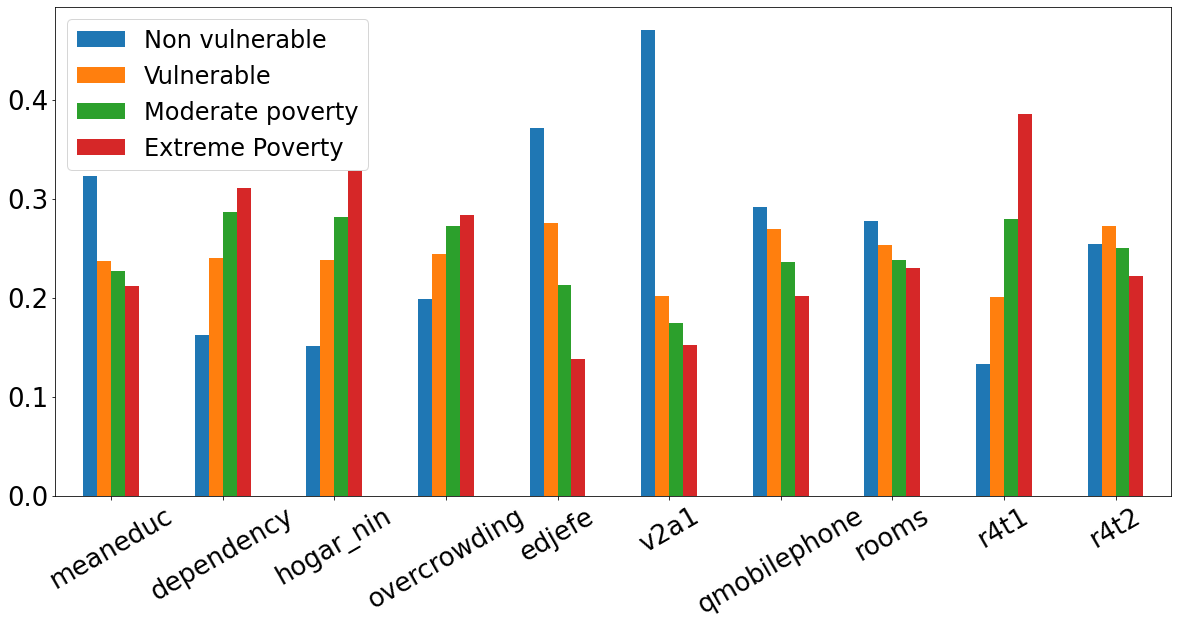

In [41]:

w = 0.5
res.plot(kind='bar', width=w, figsize=(20,9), fontsize=26)
plt.legend(loc=2, prop={'size': 24})
plt.xticks(rotation=30)

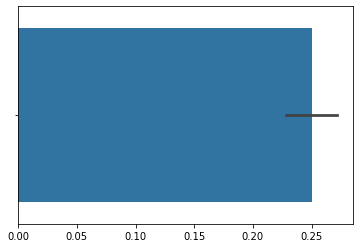